<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 2 - Fronteras no Lineales </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* similaridad: KNN
* Selección de hı́per-parámetros estructurales en SVM, Arboles de Decisión, k-NN y Redes Neuronales.
* Métodos de *kernel*.
* Extracción de características.
* Múltiples anotaciones

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de discusión y entrega: 8 de Noviembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF393-II-2018]

<hr style="height:2px;border:none"/>

### Paquetes de instalación

Como es usual utilizaremos *numpy, scipy, matplotlib* y *sklearn*. Además de éstas se necesitará instalar **keras**, una librerı́a en python para prototipado rápido de modelos basados en redes neuronales, muy similar en espı́ritu a *sklearn*. La librerı́a puede usar *TensorFlow* o *Theano* como backend, siendo éstas las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos. Para detalles sobre la instalación puede revisar [[1]](#refs) o escribir un email a su ayudante.



La tarea se divide en secciones:

[1.](#primero) Sentiment Analysis en Texto  
[2.](#segundo) pendiente


<a id="primero"></a>
## 1. Sentiment Analysis en Texto

El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud
que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un
tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la polaridad
de un trozo de texto, es decir, clasificar una determinada evaluación escrita (*review*), en que una persona
manifiesta una opinión, como *positiva*, *negativa* o *neutral*. Esto también ha sido extendido a otros medios, como lo es analizar la polaridad de textos en redes sociales.  La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente las personas ası́ como el manejo de negaciones, sarcasmo y abreviaciones en una frase.

<img src="https://formtitanhelpdeskimage.s3.amazonaws.com/70c78f9df2fd5c130e7021644f78f4c5.jpg" title="Title text" width="40%" />


Los datos que usaremos para esta actividad corresponden a un subconjunto de los datos publicados en **Kaggle**,  en  el  contexto  de  una  competencia  organizada  por  la  Universidad  de  Stanford  [[2]](#refs).   Cada  registro disponible corresponderá a una opinión sobre una película, registrada sobre el sitio *Rotten Tomatoes*.  Para empezar  nos  limitaremos  a  estudiar  textos  anotados  como  positivos  o  negativos,  clases  que  codificaremos como +1 y 0 respectivamente. Los datos pueden ser descargados ejecutando el siguiente código en sistema Unix:
```
wget -O train_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train
wget -O test_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev
```

> Cargue los dos conjuntos de datos a ser trabajados, donde la etiqueta ya viene codificada y la dejaremos como negativo (0) y positivo (1).
```python
import pandas as pd
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1
fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
... #same loading for test
df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values
```

In [1]:
!wget -O train_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train
!wget -O test_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev

--2019-11-12 12:31:26--  http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train
Resolving www.inf.utfsm.cl (www.inf.utfsm.cl)... 200.1.19.11, 2800:270:c::11
Connecting to www.inf.utfsm.cl (www.inf.utfsm.cl)|200.1.19.11|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train [following]
--2019-11-12 12:31:42--  https://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train
Connecting to www.inf.utfsm.cl (www.inf.utfsm.cl)|200.1.19.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 418331 (409K) [application/octet-stream]
Saving to: ‘train_data.csv’

train_data.csv      100%[===================>] 408,53K  1,45MB/s    in 0,3s    

2019-11-12 12:31:42 (1,45 MB/s) - ‘train_data.csv’ saved [418331/418331]

--2019-11-12 12:31:42--  http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev
Resolving www.inf.utfsm.cl (www.inf.utfsm.cl)... 200.1.19.11, 2800:270:c::11
Connec

In [2]:
!ls
!head test_data.csv

Enunciado.ipynb  test_data.csv	train_data.csv
-1 screenwriter dan schneider and director shawn levy substitute volume and primary colors for humor and bite .
-1 home alone goes hollywood , a funny premise until the kids start pulling off stunts not even steven spielberg would know how to do . besides , real movie producers aren't this nice .
+1 seldom has a movie so closely matched the spirit of a man and his work .
-1 less dizzying than just dizzy , the jaunt is practically over before it begins .
-1 an ultra-low-budget indie debut that smacks more of good intentions than talent .
-1 at the very least , if you don't know anything about derrida when you walk into the theater , you won't know much more when you leave .
-1 the problem is that the movie has no idea of it is serious or not .
+1 a searing , epic treatment of a nationwide blight that seems to be , horrifyingly , ever on the rise .
+1 visually striking and viscerally repellent .
+1 noyce has worked wonders with the material .

In [3]:
import pandas as pd
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1

ftr.close()

fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1

fts.close()

df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values




> a) Describa los datos trabajados, como la cantidad de datos en cada conjunto, largo de los textos, la cantidad de ejemplo por cada clase, o alguna otra forma que piense que pueda ser útil para comprender el problema trabajado.
```python
df_train_sentiment.shape
```

In [4]:
df_train

,Sentiment,Text
0,0.0,"everything's serious , poetic , earnest and --..."
1,0.0,"narratively , trouble every day is a plodding ..."
2,1.0,a truly wonderful tale combined with stunning ...
3,1.0,jason patric and ray liotta make for one splen...
4,0.0,haneke keeps us at arm's length . guided more ...
...,...,...
3549,0.0,it takes a strange kind of laziness to waste t...
3550,0.0,"an easy watch , except for the annoying demean..."
3551,1.0,dog soldiers doesn't transcend genre -- it emb...
3552,0.0,it uses the pain and violence of war as backgr...


In [5]:
import pandas

palabras_diferentes = 0
palabras = {}
for linea in df_train.Text:
    for palabra in linea.split(" "):
        if palabra not in palabras:
            palabras[palabra] = 1
            palabras_diferentes+=1
        else:
            palabras[palabra] +=1

print("Palabras Diferentes: ",palabras_diferentes)
df = pandas.DataFrame(list(palabras.items()), columns=["Palabra","N_veces"])

df

mean =pandas.DataFrame.mean(df)
dv = pandas.DataFrame.std(df)

print("Media:", mean)
print("Desviacion Estandar", dv)

Palabras Diferentes:  11698
Media: N_veces    6.373825
dtype: float64
Desviacion Estandar N_veces    71.248868
dtype: float64


> b) Construya un conjunto de validación desde el conjunto de entrenamiento para seleccionar modelos. Decida el tamaño dada la cantidad de ejemplos que se tienen para entrenamiento.
```python
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= choose size, random_state=0)
```

In [6]:
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size=0.2, random_state=0)

> c) Realice un pre-procesamiento a los textos para normalizar un poco su estructura, para ello utilice el código de ejemplo a continuación, donde se pasa el texto a minúsculas (*lower-casing*), se reducen las mútliples letras, se eliminan palabras sin significados como artículos, pronombres y preposiciones (*stop word removal* [[3]](#refs)), además de pasar las palabras a su tronco léxico con la técnica de *lemmatizer* [[4]](#refs). Comente la importancia de un correcto pre-procesamiento en el domino de lenguaje natural.
```python
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words
... #try yourself
word_extractor("I love to eat cake")
word_extractor("I love eating cake")
word_extractor("I loved eating the cake")
word_extractor("I do not love eating cake")
word_extractor("I don't love eating cake")
... #try yourself
texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]
```

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ] # lo separa en diferentes palabras
    for word in wordtokens: 
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words


texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

In [12]:
palabras_diferentes = 0
palabras = {}
for linea in texts_train:
    for palabra in linea.split(" "):
        if palabra not in palabras:
            palabras[palabra] = 1
            palabras_diferentes+=1
        else:
            palabras[palabra] +=1

print("Palabras Diferentes: ",palabras_diferentes)
df = pandas.DataFrame(list(palabras.items()), columns=["Palabra","N_veces"])

mean =pandas.DataFrame.mean(df)
dv = pandas.DataFrame.std(df)

print("Media:", mean)
print("Desviacion Estandar", dv)

Palabras Diferentes:  8980
Media: N_veces    4.649109
dtype: float64
Desviacion Estandar N_veces    59.090506
dtype: float64


Debemos realizar pre procesamiento del lenguaje natural, por que a fin de cuentas, la máquina solo vera números. Y esto significa que un salto de linea podría provocar que la máquina tenga cierta percepción cuando noe s así.


Ademas, hacemos cosas como pasar a minusculas todo para reducir el espacio de búsqueda y ademas que no considere diferentes dos palabras que realmente son la misma (Hola vs hola), finalment se remueven palabras comunes para que estas no afecten al procesamiento

> d) Construya una representación vectorial a los textos de entrada para poder ser manejados y clasificados por los modelos de aprendizaje. Para ésto utilice el tipo de característica más común, que consiste en contar cuántas veces aparece cada términos/palabras en el texto, denominado **TF** (*term-frequency*). Para esto, se necesita contar con un vocabulario base, el cual se construirá a través de la unión de todas las palabras que observemos en los textos de entrenamiento ¿Cuáles son las palabras más frecuentes?
```python
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
... #transform val and test
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))
```

In [40]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)

vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

df_vocab = pandas.DataFrame(vocab, columns=["Palabra"])
df_dist = pandas.DataFrame(dist, columns=["Frecuencia"])

df_concat = pandas.concat([df_vocab, df_dist], sort=False,axis=1)
df_concat.nlargest(20, 'Frecuencia')

,Palabra,Frecuencia
2894,film,468
4954,movie,399
5245,one,208
3422,ha,200
4434,like,192
4607,make,156
7200,story,143
1200,character,136
2603,even,119
7649,time,118


In [140]:
df_vocab

,Palabra
0,10
1,100
2,101
3,105
4,10th
...,...
8536,zucker
8537,zwick
8538,último
8539,últimos


> e) Para tener una visión distinta y entender mejor la representación vectorial realizada, visualice los datos en un plano 2D. Para ésto utilice la técnica **LSA** (*Latent Semantic Analysis*) [[5]](#refs) que a diferencia de PCA, **no centra** los datos antes de realizar la descomposicipon SVD, de ésta manera podrá visualizar el espacio semántico de "conceptos" latentes usados en la representación. Coloree cada texto en base a su clase ¿Qué indica lo observado? Comente e interprete los resultados
```python
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()
```

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(20,15))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()

Podemos ver que hay ciertos grupos de palabras que expresan el mismo sentimiento, sin embargo tambien es posible notar que estos no se encuentran claramente dispersos (a excepción de algunos outlayers)

> f) Entrene un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma $l_2$). Varíe el parámetro de regularización $C$, en potencias de 10, midiendo el error de predicción obtenido sobre los datos de entrenamiento y validación, construya un gráfico que muestre la variación de ambos errores respecto al parámetro $C$. Explique el significado y valor esperado del parámetro de regularización.
```python
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    print("Param C= ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4)]
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= ...)
```

In [15]:
features_val = vectorizer.transform(texts_val)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


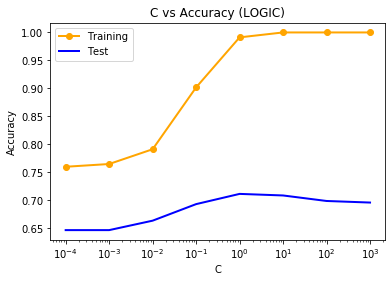

In [16]:

from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
   # print("Param C= ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4, dtype=float)]

accuracys_train = []
accuracys_test  = []

for C in Cs:
    model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param=C)
    accuracys_train.append((C,train_acc))
    accuracys_test.append((C,test_acc))
    

df_accuracys_train = pandas.DataFrame(accuracys_train, columns=["C", "Training"])
df_accuracys_test = pandas.DataFrame(accuracys_test, columns=["C", "Test"])
    
plt.plot( 'C', 'Training', data=df_accuracys_train, marker='o', color='orange', linewidth=2)
plt.plot( 'C', 'Test', data=df_accuracys_test, marker='', color='blue', linewidth=2)
plt.title('C vs Accuracy (LOGIC)')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.xscale('log')
plt.legend()




C es el inverso de la "fuerza" de la regularización, mientras más pequeño, más regulariza los datos

> g) Entrene una Máquina de Soporte Vectorial (SVM) con distintos kernels. Similar a lo anterior, construya un gráfico que muestre la variación de ambos errores respecto al parámetro de regularización $C$ para cada tipo de kernel que experimente. Explique el significado y valor esperado de los parámetros en este modelo.
```python
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    print("Param C= ",C, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=C,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4)]
```

In [17]:

from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    print("Param C= ",C, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=C,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4, dtype=float)]

accuracys_train = dict()
accuracys_test  = dict()

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for C in Cs:
        model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val,C,kernel )
        if kernel not in accuracys_train:
            accuracys_train[kernel] = list()
            accuracys_test[kernel] = list()
        accuracys_train[kernel].append((C,train_acc))
        accuracys_test[kernel].append((C,test_acc))
    





Param C=  0.0001 Kernel=  linear
Param C=  0.001 Kernel=  linear
Param C=  0.01 Kernel=  linear
Param C=  0.1 Kernel=  linear
Param C=  1.0 Kernel=  linear
Param C=  10.0 Kernel=  linear
Param C=  100.0 Kernel=  linear
Param C=  1000.0 Kernel=  linear
Param C=  0.0001 Kernel=  poly


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  0.001 Kernel=  poly


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  0.01 Kernel=  poly


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  0.1 Kernel=  poly


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  1.0 Kernel=  poly


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  10.0 Kernel=  poly


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  100.0 Kernel=  poly


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  1000.0 Kernel=  poly


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  0.0001 Kernel=  rbf


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  0.001 Kernel=  rbf


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  0.01 Kernel=  rbf


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  0.1 Kernel=  rbf


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  1.0 Kernel=  rbf


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  10.0 Kernel=  rbf


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  100.0 Kernel=  rbf


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  1000.0 Kernel=  rbf


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  0.0001 Kernel=  sigmoid


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  0.001 Kernel=  sigmoid


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  0.01 Kernel=  sigmoid


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  0.1 Kernel=  sigmoid


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  1.0 Kernel=  sigmoid


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  10.0 Kernel=  sigmoid


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  100.0 Kernel=  sigmoid


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  1000.0 Kernel=  sigmoid


/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


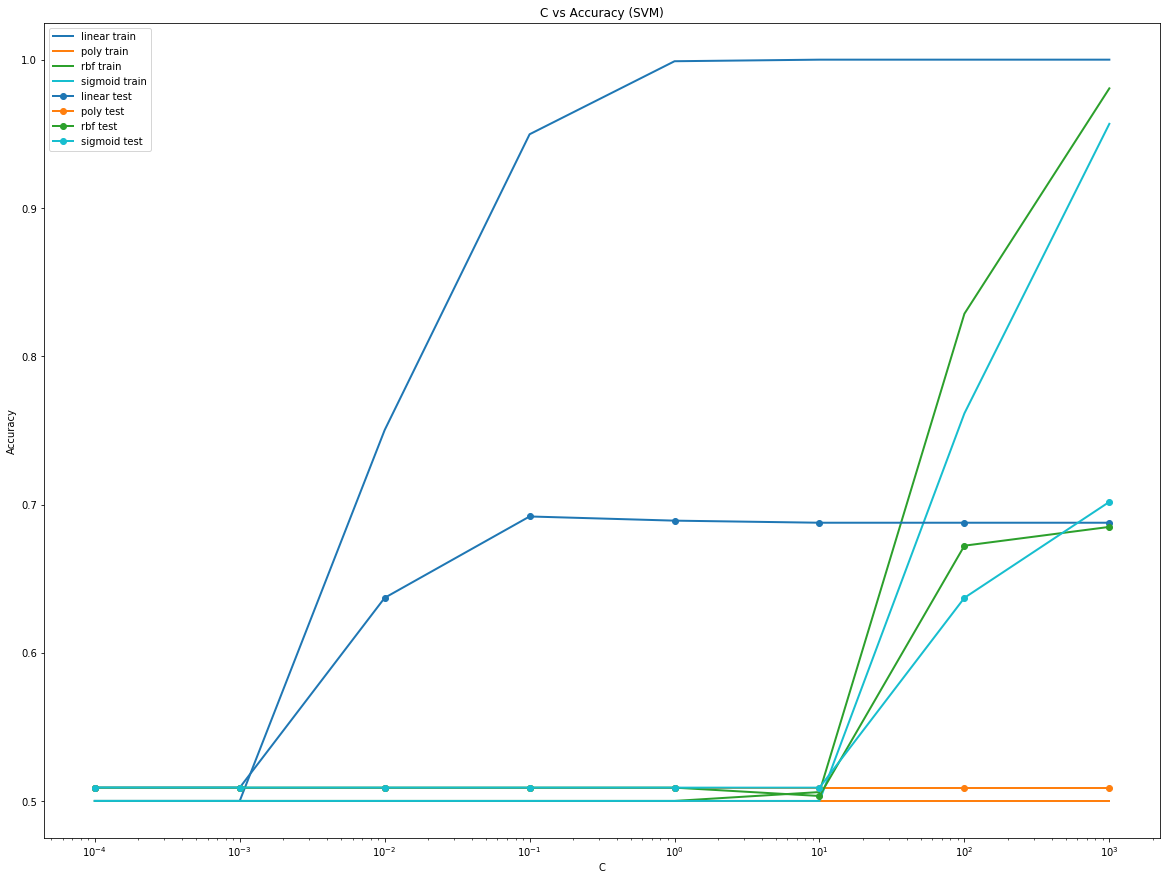

In [18]:
colores = {"linear": "tab:blue","poly": "tab:orange", "rbf":"tab:green" , "sigmoid":"tab:cyan"}

plt.figure(figsize=(20,15))
for kernel, data in accuracys_train.items():
    plt.plot( 'C', 'Training', data=pandas.DataFrame(data, columns=["C", "Training"]), marker='', color=colores[kernel], linewidth=2, label=kernel+" train")
    
for kernel, data in accuracys_test.items():
    plt.plot( 'C', 'Test', data=pandas.DataFrame(data, columns=["C", "Test"]), marker='o', color=colores[kernel], linewidth=2, label=kernel+" test")
    
plt.title('C vs Accuracy (SVM)')
plt.ylabel('Accuracy')

plt.xlabel('C')
plt.xscale('log')
plt.legend()

C es la penalización que se aplica cuando se comete un error

> h) Utilice el algoritmo de similaridad k-NN para intentar resolver el problema. Varíe el parámetro de los vecinos $k$ en un rango que estime conveniente y realice graficos de errores como en las preguntas anteriores. Comente sobre el valor esperado de este parámetro.
```python
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Ks = np.arange(1, features_train.shape[1], steps)
```

Param K=  1
Param K=  95
Param K=  189
Param K=  283
Param K=  377
Param K=  471
Param K=  565
Param K=  659
Param K=  753
Param K=  847
Param K=  941
Param K=  1035
Param K=  1129
Param K=  1223
Param K=  1317
Param K=  1411
Param K=  1505
Param K=  1599
Param K=  1693
Param K=  1787
Param K=  1881
Param K=  1975
Param K=  2069
Param K=  2163
Param K=  2257
Param K=  2351
Param K=  2445
Param K=  2539
Param K=  2633
Param K=  2727
Param K=  2821


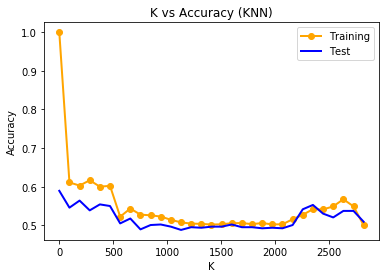

In [19]:

from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Ks = np.arange(1, features_train.shape[0],int(features_train.shape[0]/30))


accuracys_train = []
accuracys_test  = []

for K in Ks:
    model, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val, K)
    accuracys_train.append((K,train_acc))
    accuracys_test.append((K,test_acc))
    

df_accuracys_train = pandas.DataFrame(accuracys_train, columns=["K", "Training"])
df_accuracys_test = pandas.DataFrame(accuracys_test, columns=["K", "Test"])
    
plt.plot( 'K', 'Training', data=df_accuracys_train, marker='o', color='orange', linewidth=2)
plt.plot( 'K', 'Test', data=df_accuracys_test, marker='', color='blue', linewidth=2)
plt.title('K vs Accuracy (KNN)')
plt.ylabel('Accuracy')
plt.xlabel('K')
#plt.xscale('log')
plt.legend()




El parametro K es la cantidad de vecinos, se esperaria que mientras más grande sea (es decir más vecinos considere), el accuracy sea menor

> i) Entrene un Arbol de Decisión para resolver el problema. Varíe los parámetros de *max depth* y *min samples split* de manera separada, constuyendo gráficos de error respecto a estos parámetros. *Los valores que se presentan son sugerencias, no es necesario utilizar los mismos*. Comente sobre la diferencia entre la selección de estos dos parámetros.
```python
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Depths = np.arange(1, features_train.shape[1], steps ) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , steps ) #choose steps
```

In [20]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Depths = np.arange(1, features_train.shape[1], int(features_train.shape[1]/10) ) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , int(features_train.shape[0]/10) ) #choose steps



Param Max-D=  1 Min-samples-S=  2
Param Max-D=  855 Min-samples-S=  2
Param Max-D=  1709 Min-samples-S=  2
Param Max-D=  2563 Min-samples-S=  2
Param Max-D=  3417 Min-samples-S=  2
Param Max-D=  4271 Min-samples-S=  2
Param Max-D=  5125 Min-samples-S=  2
Param Max-D=  5979 Min-samples-S=  2
Param Max-D=  6833 Min-samples-S=  2
Param Max-D=  7687 Min-samples-S=  2


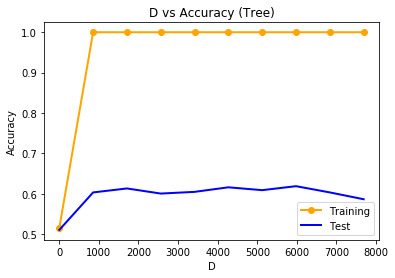

In [21]:

accuracys_train = []
accuracys_test  = []

for D in Depths:
    model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, D, SamplesS[0])
    accuracys_train.append((D,train_acc))
    accuracys_test.append((D,test_acc))
    

df_accuracys_train = pandas.DataFrame(accuracys_train, columns=["D", "Training"])
df_accuracys_test = pandas.DataFrame(accuracys_test, columns=["D", "Test"])
    
plt.plot( 'D', 'Training', data=df_accuracys_train, marker='o', color='orange', linewidth=2)
plt.plot( 'D', 'Test', data=df_accuracys_test, marker='', color='blue', linewidth=2)
plt.title('D vs Accuracy (Tree)')
plt.ylabel('Accuracy')
plt.xlabel('D')
#plt.xscale('log')
plt.legend()



Param Max-D=  8000 Min-samples-S=  2
Param Max-D=  8000 Min-samples-S=  286
Param Max-D=  8000 Min-samples-S=  570
Param Max-D=  8000 Min-samples-S=  854
Param Max-D=  8000 Min-samples-S=  1138
Param Max-D=  8000 Min-samples-S=  1422
Param Max-D=  8000 Min-samples-S=  1706
Param Max-D=  8000 Min-samples-S=  1990
Param Max-D=  8000 Min-samples-S=  2274
Param Max-D=  8000 Min-samples-S=  2558
Param Max-D=  8000 Min-samples-S=  2842


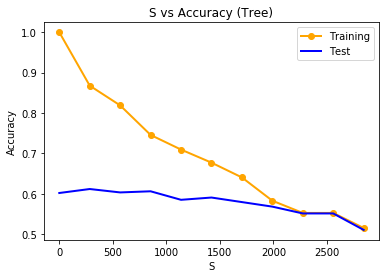

In [29]:

accuracys_train = []
accuracys_test  = []

for S in SamplesS:
    model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, 8000, S) # Elegimos el mejor valor del anterior
    accuracys_train.append((S,train_acc))
    accuracys_test.append((S,test_acc))
    

df_accuracys_train = pandas.DataFrame(accuracys_train, columns=["S", "Training"])
df_accuracys_test = pandas.DataFrame(accuracys_test, columns=["S", "Test"])
    
plt.plot( 'S', 'Training', data=df_accuracys_train, marker='o', color='orange', linewidth=2)
plt.plot( 'S', 'Test', data=df_accuracys_test, marker='', color='blue', linewidth=2)
plt.title('S vs Accuracy (Tree)')
plt.ylabel('Accuracy')
plt.xlabel('S')
#plt.xscale('log')
plt.legend()



> j) Utilice una Red Neuronal Artificial (ANN) para intentar resolver el problema, como la que se señala a continuación (utilizando el framework de *keras*): entrenada por 25 iteraciones al dataset (*epochs*) con un tamaño de *batch* de 128 para las actualizaciones de los pesos, utilizando *SGD* con una tasa de aprendizaje $0.1$ sobre la función de pérdida binaria de clasificación. La arquitectura de la red contiene una capa de salida con una única neurona que indica la probabilidad de que el texto sea positivo, una capa escondida con número de neuronas $N_h$ y la capa de entrada implícita para $x$. Varíe el parámetro que corresponde al número de neuronas en la capa oculta $N_h$, en potencias de 2, y vuelva a realizar el gráfico de error con respecto al parámetro. Comente.
```python
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,10)]
```

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,10)]




Using TensorFlow backend.


Neuron hidden =  2
Neuron hidden =  4
Neuron hidden =  8
Neuron hidden =  16
Neuron hidden =  32
Neuron hidden =  64
Neuron hidden =  128
Neuron hidden =  256
Neuron hidden =  512


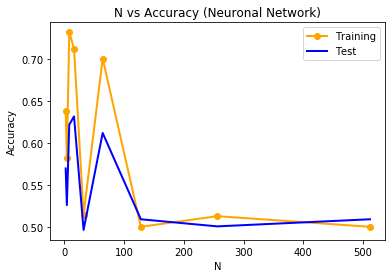

In [35]:
accuracys_train = []
accuracys_test  = []

for N in N_h:
    model, train_acc, test_acc = do_ANN(features_train,labels_train,features_val,labels_val, N)
    accuracys_train.append((N,train_acc))
    accuracys_test.append((N,test_acc))
    

df_accuracys_train = pandas.DataFrame(accuracys_train, columns=["N", "Training"])
df_accuracys_test = pandas.DataFrame(accuracys_test, columns=["N", "Test"])
    
plt.plot( 'N', 'Training', data=df_accuracys_train, marker='o', color='orange', linewidth=2)
plt.plot( 'N', 'Test', data=df_accuracys_test, marker='', color='blue', linewidth=2)
plt.title('N vs Accuracy (Neuronal Network)')
plt.ylabel('Accuracy')
plt.xlabel('N')
#plt.xscale('log')
plt.legend()



> k) Ahora evalúe sobre el conjunto de pruebas el mejor modelo obtenido, seleccionado en base a la métrica de desempeño en el conjunto de validación. Comente sobre la calidad obtenida en el problema trabajado ¿Es un buen valor? ¿Cuál podría ser un valor de referencia?

In [50]:
features_test = vectorizer.transform(texts_test)


# Lo cargamos denuevo para habilitar probability
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    print("Param C= ",C, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=C,kernel=kernel, probability=True) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc


model, train_acc, test_acc = do_SVM(features_train,labels_train,features_test,labels_test,1,"linear" )

print(test_acc)

Param C=  1000.0 Kernel=  linear
0.7045582442318514


Es un buen valor (al menos mejor que algo aleatorio), sin embnargo se esperaria una accuraccy mayor al 90%, ademas es interesante notar que la red neuronal arrojo peores resultados que SVM 

> l) Para comparar sus resultados utilice el modelo VADER (*Valence Aware Dictionary and sEntiment Reasoner*) [[6]](#refs), el cual entrega una *score* de predicción a nivel léxico (de palabras que comúnmente se asocian a una orientiación positiva o negativa). Este modelo construido manualmente no requiere entrenamiento, por lo que solo debe evaluar en conjunto de pruebas realizando predicciones del texto bruto (sin pre-procesamiento). Comente.
```python
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)
```
>> Para instalar VADER ejecute en consola:
```
pip install vaderSentiment
```

In [51]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)

0.6359032076533483

> m) Bajo la idea del modelo VADER realice un análisis de qué palabras su modelo tiende a considerar como positivas o negativas por si solas. Algunos de los modelos estudiados en esta sección realizan una predicción probabilista, utilice uno de éstos para verificar lo solicitado. Sobre la representación *TF* genere datos de entradas que contengan una sola palabra del vocabulario para evaluar que predicción les genera su modelo a esas palabras. Muestre las palabras más negativas y positivas en el vocabulario consideradas por su modelo. Comente.
```python
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)
vocab
```

In [77]:
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)


In [78]:

df_vocab = pandas.DataFrame(vocab, columns=["Palabra"])

# Elegimos este orden ya que si no worst (que por simple impección es negativa aparece como positiva)
df_word_scores = pandas.DataFrame(word_scores, columns=["Negativa", "Positiva"])

df_concat_2 = pandas.concat([df_vocab, df_word_scores], sort=False,axis=1)
df_concat_2.nlargest(20, 'Negativa')



,Palabra,Negativa,Positiva
8455,worst,0.825707,0.174293
5033,naturally,0.817555,0.182445
6796,simple,0.777575,0.222425
1213,charlie,0.775356,0.224644
5858,promotion,0.771448,0.228552
7317,suffer,0.760386,0.239614
1427,comedic,0.757754,0.242246
398,apparent,0.757496,0.242504
5141,nothing,0.754516,0.245484
2029,devoid,0.749602,0.250398


In [75]:
df_concat_2.nlargest(20, 'Positiva')


,Palabra,Negativa,Positiva
6845,skillful,0.185339,0.814661
5258,openness,0.218813,0.781187
8424,wonderful,0.221999,0.778001
4674,marvel,0.229974,0.770026
2483,engage,0.232961,0.767039
1941,dense,0.237573,0.762427
8414,witty,0.253750,0.746250
5767,prehistoric,0.254024,0.745976
7183,stitch,0.257817,0.742183
7172,still,0.260170,0.739830


> n) Intente mejorar los resultados de otra manera. Varíe el pre-procesamiento realizado a los datos en c), por ejemplo eliminar símbolos, números o aplicar la técnica de *stemmming* [[7]](#refs) en lugar de *lemmatization* para llevar a su tronco léxico.
```python
from nltk.stem.porter import PorterStemmer
wordstemmer = PorterStemmer()
wordstemmer.stem(word)
```

In [79]:
from nltk.stem.porter import PorterStemmer

def base_word(word):
    wordlemmatizer = PorterStemmer()
    return wordlemmatizer.stem(word) 

def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words


texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

In [80]:
model, train_acc, test_acc = do_SVM(features_train,labels_train,features_test,labels_test,1,"linear" )

print(test_acc)

Param C=  1000.0 Kernel=  linear
0.7045582442318514


> o) Varíe la representación utilizada actualmente por alguna otra que ayude a mejorar el desempeño, por ejemplo reducir el peso de una palabra si es que aparece en muchos textos: TF-IDF. Existen varias opciones que podría realizar para mejorar el desempeño, por ejemplo reducir el vocabulario a las $K$ palabras más frecuentes, eliminar las palabras menos frecuentes, normalizar la representación, utilizar *n-gramas*, entre otras.
```python
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train)
tfidf_model.transform(texts_train)
... #for val and test
```

In [81]:
#REVISAR

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train)
tfidf_model.transform(texts_train)



model, train_acc, test_acc = do_SVM(features_train,labels_train,features_test,labels_test,1,"linear" )


<2843x7047 sparse matrix of type '<class 'numpy.float64'>'
	with 31413 stored elements in Compressed Sparse Row format>

> p) Utilice métricas auxiliares para entender en qué falla su mejor modelo obtenido hasta el momento. ¿La información entregada indica cómo se podría mejorar o cual sería la causa de la falla?
```python
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
score_the_model(model, features_test, labels_test )
```

In [82]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
score_the_model(model, features_test, labels_test )

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.72      0.68      0.70      1803
           +       0.69      0.73      0.71      1751

    accuracy                           0.70      3554
   macro avg       0.71      0.70      0.70      3554
weighted avg       0.71      0.70      0.70      3554



No realmente

> q) Algo que se puede modificar en algunos modelos de aprendizaje es poner peso en cada una de las clases, por ejemplo si una clase es de mayor interés que las otras e interesa reducir más su error. En *sklearn* ésto puede ser realizado con el parámetro de *class_weights*. Por ejemplo, asigne que detectar los textos negativos me interesa 5 veces más que detectar los textos positivos. Comente.
```python
classes_weights = {0: 5, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)
```

In [85]:
classes_weights = {0: 100, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.72      0.68      0.70      1803
           +       0.69      0.73      0.71      1751

    accuracy                           0.70      3554
   macro avg       0.71      0.70      0.70      3554
weighted avg       0.71      0.70      0.70      3554



No se observan cambios aun probando con valores mucho más grandes

> r) Visualice la clasificación que realiza su mejor modelo sobre algunos textos de pruebas ¿Qué entega mas información, una predicción categórica o una continua? ¿Cuál podría ser el beneficio de una o de otra? Comente
```python
test_pred = log_model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)
```

In [87]:
test_pred = model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  0.0 -- Pred sent:  [0.47967581 0.52032419]
Raw text:  incoherence reigns .

True sent:  0.0 -- Pred sent:  [0.71826277 0.28173723]
Raw text:  it's a movie forged in the fires of chick flick hell .

True sent:  0.0 -- Pred sent:  [0.11602194 0.88397806]
Raw text:  yes , i suppose it's lovely that cal works out his issues with his dad and comes to terms with his picture-perfect life -- but world traveler gave me no reason to care , so i didn't .

True sent:  1.0 -- Pred sent:  [0.27830107 0.72169893]
Raw text:  canadian filmmaker gary burns' inventive and mordantly humorous take on the soullessness of work in the city .

True sent:  0.0 -- Pred sent:  [0.90914165 0.09085835]
Raw text:  at its best , queen is campy fun like the vincent price horror classics of the '60s . at its worst , it implodes in a series of very bad special effects .

True sent:  0.0 -- Pred sent:  [0.29122572 0.70877428]
Raw text:  the movie generates plot points with a degree of randomness usually achie

Una continua entre mucha más información, esta podría ser mucho más util si por ejemplo decidimos ordenar los comentarios por que tan negativos o positivos son, un valor de 0/1 nos serviria por ejemplo para dar un rating general de la pelicula / poner un icono de si el comentario es positivo negativo, etc

> s) Comente sobre el desempeño obtenido por los diferentes modelos de aprendizaje utilizados al enfrentar el problema, ¿Dónde pareciera estar la mejora? ¿En la variación de los modelos y sus parámetros o en la modificación de la representación? ¿Cuál modelo de aprendizaje le parece mejor en base a su criterio? ya sea desempeño, tiempo de ejecución comodidad en las decisiones involucradas, etc.

Aunque no se han hecho pruebas con todos los modelos, pareciera ser que lo que más a funcionado es una mezcla, claramente con ciertos parametros los modelos mejoraban, pero cuando cambiamos a PorterStemmer tambien se noto una mejora del 7%, lo cual no es nada despreciable

<a id="segundo"></a>
## 2. Problema de Múltiples Anotaciones

El aprendizaje supervisado visto en clases da cuenta que existe una única posible etiqueta $z$ (*ground truth*) asociada a un dato $x$ para poder aprender de los datos. Sin embargo, la definición del *ground truth* en algunos casos puede resultar bastante difícil de definir o bastante costoso, por ejemplo en problemas médicos donde se deben realizar invasivos exámenes para conocer la "verdad absoluta". Como alternativa se pueden recolectar múltiples anotaciones desde personas inexpertas en el área para poder estimar el *ground truth*. 

<img src="http://www.irishenvironment.com/wp-content/uploads/2013/11/crowdsourcing.jpg" title="Title text" width="40%" />

En esta actividad se trabajará en el caso en que contamos con múltiples anotaciones por cada dato de entrada $x_i$ dadas por personas inexpertas a través de Amazon Mechanical Turk (__[AMT](https://www.mturk.com/)__), es decir, $y^{(1)}, y^{(2)} \ldots y^{(T_i)}$. El problema de predicción trabajado será el mismo de la actividad anterior, el análisis de sentimiento de un extracto de texto en Rotten Tomatoes. Los datos trabajados [[8]](#refs) pueden ser descargados de la página del autor.
```
wget http://fprodrigues.com//mturk-datasets.tar.gz
```

De esta manera trabajaremos con el archivo *mturk_answers.csv* en la carpeta *sentiment polarity* que se puede cargar con pandas. En este archivo se tendrán múltiples filas/registros por cada dato de entrenamiento, cada uno representando la etiqueta que entregó una persona (*worker*) a ese dato, los detalles de columnas son:
* *WorkerId*: identificador de la persona que etiquetó/anotó el dato
* *Input.id*: identificador del dato a etiquetar/anotar
* *Input.original_sentence*: texto original del dato
* *Input.stemmed_sent*: texto pre-procesado
* *Input.true_sent*: sentimiento real (*ground truth*) del dato
* *Answer.sent*:   etiqueta/anotación que entregó la persona

```python
import pandas as pd
df = pd.read_csv("./sentiment_polarity/mturk_answers.csv") 
```

> El objetivo de la actividad será el de obtener un modelo predictor del *ground truth* sin entrenar directamente con esto, sino que utilizar las múltiples anotaciones de las personas

### Importante
* Deberá crear un conjunto aleatorio de pruebas que solo contenga los textos y el sentimiento *ground truth* (sin repeticiones)
* Los valores de *ground truth* están **solo para evaluar**, no puede utilizarlos para entrenar o tomar decisiones en su modelo.
* La métrica de evaluación será el *accuracy score*
```python
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)
```

#### Sugerencias
Para representar los textos, a diferencia de lo visto en la sección 1, se puede utilizar lo que son la representación vectorial de palabras (*word vectors*), a través de modelos especializados entrenados para aprender una representación en que palabras similares estén cercanas en el espacio vectorial. Puede utilizar los vectores livianos de __[GLOVE](https://nlp.stanford.edu/projects/glove/)__ en su versión entradas en textos de Wikipedia con 6 billones de palabras/tokens.
```python
EMBEDDING_DIM = 300
GLOVE_FILE = "./glove.6B.%dd.txt"%(EMBEDDING_DIM)
embeddings_index = {}
with open(GLOVE_FILE) as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
...
embeddings_index.get(word)
```
> Para descargar GLOVE
```
wget http://nlp.stanford.edu/data/glove.6B.zip
```

In [90]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-11-19 11:44:36--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-11-19 11:44:37--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-11-19 11:44:39--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [91]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [94]:
!wget http://fprodrigues.com//mturk-datasets.tar.gz

--2019-11-20 17:01:12--  http://fprodrigues.com//mturk-datasets.tar.gz
Resolving fprodrigues.com (fprodrigues.com)... 162.241.226.178
Connecting to fprodrigues.com (fprodrigues.com)|162.241.226.178|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 325169872 (310M) [application/x-gzip]
Saving to: ‘mturk-datasets.tar.gz’

mturk-datasets.tar. 100%[===================>] 310,11M   684KB/s    in 11m 24s 

2019-11-20 17:12:37 (464 KB/s) - ‘mturk-datasets.tar.gz’ saved [325169872/325169872]



In [9]:
!tar -xzvf mturk-datasets.tar.gz

music_genre_classification/
music_genre_classification/._marsyas_features.arff
music_genre_classification/marsyas_features.arff
music_genre_classification/._mturk_answers.csv
music_genre_classification/mturk_answers.csv
music_genre_classification/music_genre_gold.csv
music_genre_classification/._music_genre_mturk.csv
music_genre_classification/music_genre_mturk.csv
music_genre_classification/music_genre_test.csv
sentiment_polarity/
sentiment_polarity/._mturk_answers.csv
sentiment_polarity/mturk_answers.csv
sentiment_polarity/polarity_gold_lsa_topics.csv
sentiment_polarity/polarity_mturk_lsa_topics.csv
sentiment_polarity/polarity_test_lsa_topics.csv


In [10]:
import numpy as np
EMBEDDING_DIM = 300
GLOVE_FILE = "./glove.6B.%dd.txt"%(EMBEDDING_DIM)
embeddings_index = {}
with open(GLOVE_FILE) as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')

In [11]:
embeddings_index.get("cool")

array([ 0.44874  , -0.4454   , -0.20424  , -0.15572  , -0.17863  ,
       -0.17937  ,  0.16693  ,  0.19144  ,  0.1905   , -1.2896   ,
        0.18248  , -0.21426  ,  0.085121 , -0.0058638, -0.026263 ,
        0.0016149, -0.36555  , -0.28236  ,  0.17898  ,  0.7489   ,
        0.32092  ,  0.74883  ,  0.081232 , -0.058681 , -0.20367  ,
       -0.38068  ,  0.18391  ,  0.09356  , -0.06925  , -0.47984  ,
       -0.49404  ,  0.058204 , -0.4334   , -0.26631  , -0.99599  ,
        0.29223  , -0.023785 ,  0.18912  , -0.36762  ,  0.34751  ,
        0.048832 ,  0.036862 , -0.35062  ,  0.10833  ,  0.4946   ,
       -0.039863 ,  0.39128  , -0.020769 , -0.12705  ,  0.046382 ,
       -0.21406  , -0.59181  ,  0.21041  , -0.56966  , -0.24769  ,
        0.38859  , -0.28034  ,  0.034968 ,  0.18841  ,  0.024812 ,
        0.3951   ,  0.35182  ,  0.3994   ,  0.16125  , -0.44957  ,
        0.24849  ,  0.23305  ,  0.45207  , -0.06272  , -0.17149  ,
       -0.17172  ,  0.068708 ,  0.11551  ,  0.25054  , -0.2877

In [12]:
import pandas as pd
df = pd.read_csv("./sentiment_polarity/mturk_answers.csv") 
df


,WorkerId,Input.id,Input.original_sentence,Input.stemmed_sent,Input.true_sent,Answer.sent
0,A2HD5XMM48KKJW,4518,"the cast is phenomenal , especially the women .",cast phenomen especi women,pos,pos
1,A2HD5XMM48KKJW,10415,"the metaphors are provocative , but too often ...",metaphor provoc often viewer left puzzl mechan...,neg,neg
2,A2HD5XMM48KKJW,7098,while there's something intrinsically funny ab...,there someth intrins funni sir anthoni hopkin ...,neg,pos
3,A2HD5XMM48KKJW,4396,a harrowing account of a psychological breakdo...,harrow account psycholog breakdown,pos,neg
4,A2HD5XMM48KKJW,2812,". . . a visually seductive , unrepentantly tr...",visual seduct unrepentantli trashi rice instal...,pos,pos
...,...,...,...,...,...,...
27741,A4F3BK6J0PCVH,7144,the movie fails to live up to the sum of its p...,movi fail live sum part,neg,neg
27742,A4F3BK6J0PCVH,8293,the balkans provide the obstacle course for th...,balkan provid obstacl cours love good woman,neg,neg
27743,A4F3BK6J0PCVH,2929,this is a smart movie that knows its classical...,smart movi know classic music know freud know ...,pos,pos
27744,A4F3BK6J0PCVH,6902,"there's something with potential here , but th...",there someth potenti movi decid lavinia conser...,neg,neg


In [13]:
df['Input.true_sent'] = df['Input.true_sent'].map({'pos': 1, 'neg': 0})
df['Answer.sent'] = df['Answer.sent'].map({'pos': 1, 'neg': 0})
df.drop(['WorkerId'], axis=1, inplace=True )

In [14]:
df

df['Input.id'].value_counts()

6322     10
4802      9
8602      8
10405     8
6500      8
         ..
8871      4
11        4
10288     4
460       4
4283      4
Name: Input.id, Length: 4999, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
df_train_text = df["Input.stemmed_sent"]
labels_train = df["Answer.sent"]

df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size=0.2, random_state=0)

In [16]:
print(len(df_train_text))
print(len(df_val_text))
print(len(labels_train))
print(len(labels_val))
print(df_train_text[0])

22196
5550
22196
5550
cast phenomen especi women


In [17]:
embeddings_index.get(df_train_text[0].split(" ")[0])

array([-1.7404e-02, -2.0478e-01,  2.0588e-01, -7.0793e-01, -1.5286e-01,
        2.4270e-01, -7.5697e-02, -1.2496e-01,  1.3033e-03, -4.9175e-01,
        1.9552e-01,  4.2761e-03, -3.3540e-02, -9.2864e-02,  1.1399e-01,
       -3.9060e-01, -2.7611e-01,  1.0310e-02,  1.2627e-01,  3.1328e-01,
        2.4073e-01, -2.9639e-02,  6.6433e-02,  3.6114e-01,  5.3779e-01,
        3.7364e-01,  1.2732e-01,  7.2566e-02,  1.4145e-01,  2.1826e-01,
        2.2366e-01,  2.5585e-01, -3.0233e-01,  2.5767e-01, -1.1179e+00,
        1.0967e-01, -8.7850e-02,  5.2202e-01,  6.3046e-01,  1.2600e-01,
       -2.4152e-01, -5.2006e-01,  3.4046e-01, -5.4086e-02, -4.5744e-02,
        1.8018e-01, -2.2397e-01, -5.0609e-01,  1.8541e-01, -9.8114e-02,
        1.4950e-01, -9.6237e-03, -1.8112e-01,  2.1907e-01,  3.4596e-01,
       -2.6661e-01,  3.9594e-02,  1.1706e-01,  4.7256e-01, -1.7204e-01,
       -1.7417e-01,  3.8725e-01,  8.8743e-02,  1.4742e-01,  5.0680e-01,
       -5.3754e-01,  4.0911e-01,  8.3474e-02, -8.9135e-03, -1.59

In [18]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
import re, time
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ] # lo separa en diferentes palabras
    for word in wordtokens: 
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words


In [19]:


texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]

In [20]:
texts_train



[' steer turn snappi screenplai curl edg clever want hate somehow pull',
 ' instead hit audienc head moral schrader reli subtl ironi visual devic convei point view',
 ' come awai film overwhelm hope perhap paradox illumin',
 ' watchabl point situat dialogu spin hopelessli control carol kane appear screen',
 ' stylish beautifulli photograph far troubl worth fantasi mix realiti actor plai role add confus',
 ' creativ come across sketch full length comedi',
 ' film tone pace almost',
 ' damon bring proper convict role jason bourn',
 ' film idea stretch point evapor whole central section big chase seem goal urgenc filler',
 ' ear split exercis formula crash bash action',
 ' stuffi full moral ambigu noth shout',
 ' everyth titl impli standard issu crime drama spat tinseltown assembl line',
 ' film appeal lot cast juliett binoch sand bring role pale dark beauti characterist warmth',
 ' tykwer surfac flash isnt poor fit kieslowski lyric pessim complet contradict everyth kieslowski work aspir 

In [21]:
# Intento de crear los vectores, no funciono
import numpy as np


def create_vector(texts):
    vector = list()
    for line in texts:
        temp = list()
        for word in word_tokenize(line):
            indices = embeddings_index.get(word)
            if indices is not None:
                for el in embeddings_index.get(word):
                    temp.append(el)
        vector.append(temp)
        
    return np.array([np.array(xi) for xi in vector])

features_train = create_vector(texts_train)
features_val = create_vector(texts_val)



In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
vocab = vectorizer.get_feature_names()
len(vocab)

8818

In [23]:
features_train.shape
vectorizer.transform(texts_train).shape

(22196, 8818)

In [29]:
def get_n_words(texts): 
    palabras_diferentes = 0
    palabras = dict()
    for linea in texts:
        for palabra in linea.split(" "):
            if palabra not in palabras:
                palabras[palabra] = 1
                palabras_diferentes+=1
            else:
                palabras[palabra] +=1
    return palabras_diferentes

#https://keras.io/examples/pretrained_word_embeddings/
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


def create_vector(texts, n_palabras_max):
    
    tokenizer = Tokenizer(num_words=n_palabras_max)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    data = pad_sequences(sequences, maxlen=n_palabras_max)
    return data

n_palabras_max = max(get_n_words(texts_train), get_n_words(texts_val))


features_train = create_vector(texts_train,n_palabras_max)
features_val = create_vector(texts_val, n_palabras_max)

In [ ]:
features_val.shape

In [ ]:
# Esto se demora como 20 minutos
accuracys_train = []
accuracys_test  = []

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,10)]




for N in N_h:
    model, train_acc, test_acc = do_ANN(features_train,labels_train,features_val,labels_val, N)
    accuracys_train.append((N,train_acc))
    accuracys_test.append((N,test_acc))
    


Neuron hidden =  2
Neuron hidden =  4
Neuron hidden =  8
Neuron hidden =  16
Neuron hidden =  32
Neuron hidden =  64
Neuron hidden =  128
Neuron hidden =  256
Neuron hidden =  512


In [ ]:
import matplotlib.pyplot as plt
df_accuracys_train = pd.DataFrame(accuracys_train, columns=["N", "Training"])
df_accuracys_test = pd.DataFrame(accuracys_test, columns=["N", "Test"])
    
plt.plot( 'N', 'Training', data=df_accuracys_train, marker='o', color='orange', linewidth=2)
plt.plot( 'N', 'Test', data=df_accuracys_test, marker='', color='blue', linewidth=2)
plt.title('N vs Accuracy (Neuronal Network)')
plt.ylabel('Accuracy')
plt.xlabel('N')
#plt.xscale('log')
plt.legend()



In [ ]:

from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    print("Param C= ",C, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=C,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4, dtype=float)]

accuracys_train = dict()
accuracys_test  = dict()

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for C in Cs:
        model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val,C,kernel )
        if kernel not in accuracys_train:
            accuracys_train[kernel] = list()
            accuracys_test[kernel] = list()
        accuracys_train[kernel].append((C,train_acc))
        accuracys_test[kernel].append((C,test_acc))
    

<a id="refs"></a>
## Referencias
[1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/  
[2] https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews  
[3] https://en.wikipedia.org/wiki/Stopwords  
[4] https://en.wikipedia.org/wiki/Lemmatisation  
[5] Landauer, T. K., Foltz, P. W., & Laham, D. (1998). *An introduction to latent semantic analysis*. Discourse processes, 25(2-3), 259-284.  
[6] https://github.com/cjhutto/vaderSentiment  
[7] https://en.wikipedia.org/wiki/Stemming  
[8] Rodrigues, F., Pereira, F., & Ribeiro, B. (2013). *Learning from multiple annotators: distinguishing good from random labelers*. Pattern Recognition Letters, 34(12), 1428-1436.